<a href="https://colab.research.google.com/github/dataostymchuk/food-project/blob/master/sales_prediction_model__NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/fmardero/FuturoLavoro/master/sales_data/db2.0.csv

--2020-03-19 18:15:24--  https://raw.githubusercontent.com/fmardero/FuturoLavoro/master/sales_data/db2.0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64734 (63K) [text/plain]
Saving to: ‘db2.0.csv’

db2.0.csv           100%[===================>]  63.22K  --.-KB/s    in 0.007s  

2020-03-19 18:15:25 (8.51 MB/s) - ‘db2.0.csv’ saved [64734/64734]



In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('db2.0.csv')
df.rename(columns={'data': 'date', 'somma_polli': 'sales', 'feste': 'holidays', 'fenomeni': 'weather'}, inplace=True)
df.date = pd.to_datetime(df.date)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
date                   1520 non-null datetime64[ns]
dayname                1520 non-null object
sales                  1520 non-null int64
t_media                1520 non-null int64
t_min                  1520 non-null int64
umidità_percentuale    1520 non-null int64
weather                1520 non-null object
juventus               1520 non-null object
holidays               83 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 107.0+ KB


In [0]:
df.head()

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
0,2015-01-01,giovedì,6,0,-5,81,sole,0,Primo dell'Anno
1,2015-01-02,venerdì,9,0,-4,85,sole,0,NaN
2,2015-01-03,sabato,14,4,-1,78,sole,0,NaN
3,2015-01-04,domenica,10,3,-3,68,sole,0,NaN
4,2015-01-05,lunedì,14,4,-3,56,sole,0,NaN


In [0]:
df.tail()

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
1515,2019-11-13,mercoledì,32,10,7,65,sole,0,NaN
1516,2019-11-14,giovedì,35,8,2,67,sole,0,NaN
1517,2019-11-15,venerdì,54,10,6,87,sole,0,NaN
1518,2019-11-16,sabato,52,8,5,92,sole,0,NaN
1519,2019-11-17,domenica,43,9,5,89,sole,0,NaN


## Cleaning Days

In [0]:
df.dayname.value_counts()

sabato       255
venerdì      253
giovedì      252
martedì      250
mercoledì    250
domenica     249
lunedì        11
Name: dayname, dtype: int64

Delete Mondays

In [0]:
df.drop(index=df.query("dayname == 'lunedì'").index, inplace=True)

In [0]:
df.dayname.value_counts()

sabato       255
venerdì      253
giovedì      252
martedì      250
mercoledì    250
domenica     249
Name: dayname, dtype: int64

## AutoCorrelogram

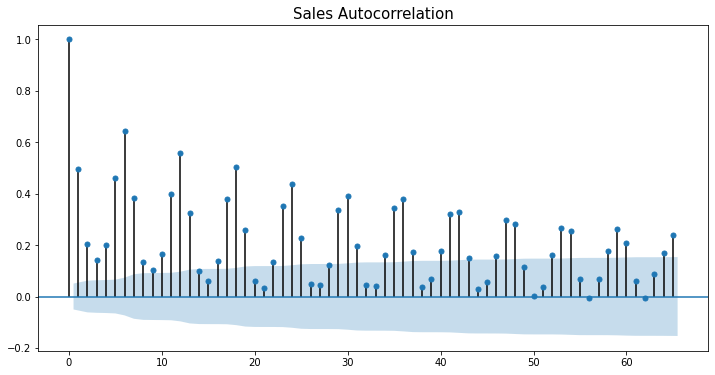

In [0]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df.sales.values, lags=65, ax=ax)
plt.title('Sales Autocorrelation', fontsize=15)
plt.show()

## Sales PDF

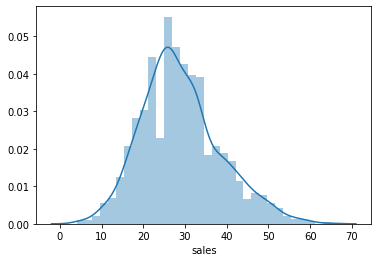

In [0]:
sns.distplot(df.sales, rug=False)

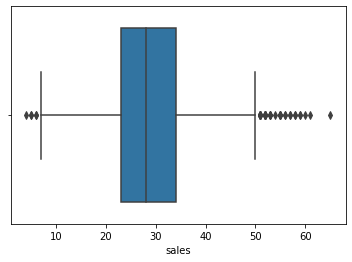

In [0]:
sns.boxplot(df.sales)

In [0]:
df.query('sales < 10')

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
0,2015-01-01,giovedì,6,0,-5,81,sole,0,Primo dell'Anno
1,2015-01-02,venerdì,9,0,-4,85,sole,0,NaN
6,2015-01-07,mercoledì,4,3,-1,83,sole,serie A,NaN
10,2015-01-11,domenica,6,1,-2,91,nebbia,0,NaN
13,2015-01-15,giovedì,8,4,0,88,pioggia nebbia,0,NaN
19,2015-01-22,giovedì,7,6,5,87,pioggia,0,NaN
82,2015-04-05,domenica,5,9,6,62,pioggia,serie A,Pasqua
83,2015-04-07,martedì,8,10,2,37,sole,0,NaN
439,2016-05-31,martedì,9,19,15,73,sole,0,NaN
616,2016-12-22,giovedì,9,4,-1,84,sole,0,NaN


### First 100 days after opening

In [0]:
df.iloc[:21]

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
0,2015-01-01,giovedì,6,0,-5,81,sole,0,Primo dell'Anno
1,2015-01-02,venerdì,9,0,-4,85,sole,0,NaN
2,2015-01-03,sabato,14,4,-1,78,sole,0,NaN
3,2015-01-04,domenica,10,3,-3,68,sole,0,NaN
5,2015-01-06,martedì,13,2,-3,80,sole,0,Epifania
6,2015-01-07,mercoledì,4,3,-1,83,sole,serie A,NaN
7,2015-01-08,giovedì,10,4,1,84,sole,0,NaN
8,2015-01-09,venerdì,13,2,-1,91,nebbia,0,NaN
9,2015-01-10,sabato,14,2,-1,90,nebbia,0,NaN
10,2015-01-11,domenica,6,1,-2,91,nebbia,0,NaN


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


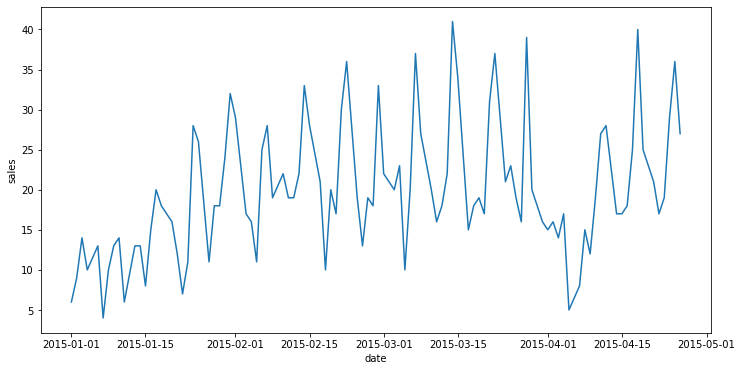

In [0]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.iloc[:100], x='date', y='sales')
plt.show()

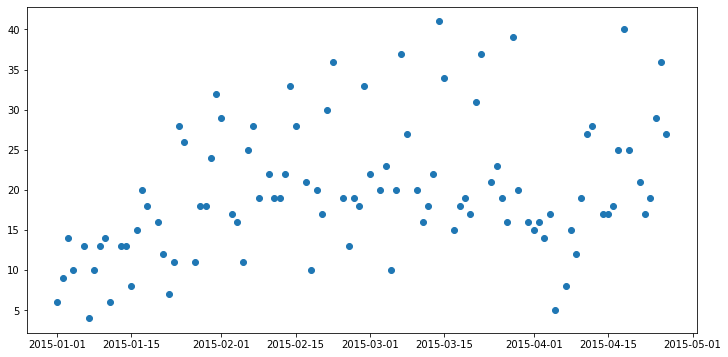

In [0]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df.loc[:100, 'date'], y=df.loc[:100, 'sales'])
plt.show()

* Fist 20 days after opening: OK (not anomalies)
* Days: 2015-04-05/06 (index=82,83) anomalies doe to Easter?

In [0]:
df.loc[80:85]

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
80,2015-04-03,venerdì,14,11,7,47,sole,0,NaN
81,2015-04-04,sabato,17,10,8,53,sole,0,NaN
82,2015-04-05,domenica,5,9,6,62,pioggia,serie A,Pasqua
83,2015-04-07,martedì,8,10,2,37,sole,0,NaN
84,2015-04-08,mercoledì,15,11,2,46,sole,0,NaN
85,2015-04-09,giovedì,12,13,6,53,sole,0,NaN


In [0]:
df.query("holidays == 'Pasqua'")

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
82,2015-04-05,domenica,5,9,6,62,pioggia,serie A,Pasqua


**Easter is a disaster for sales**

In [0]:
df.loc[439].name

439

In [0]:
for date in df.loc[[439, 616, 632, 852], 'date']:
    print(date)

2016-05-31 00:00:00
2016-12-22 00:00:00
2017-01-10 00:00:00
2017-09-23 00:00:00


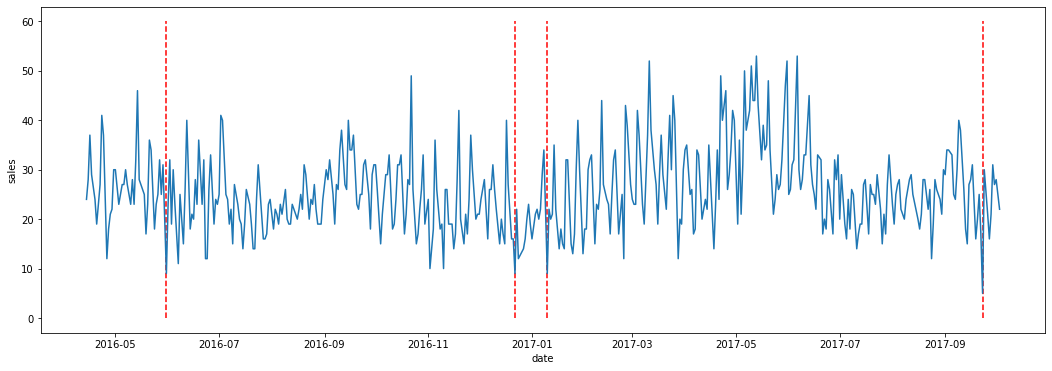

In [0]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df.loc[400:860], x='date', y='sales')
for date in df.loc[[439, 616, 632, 852], 'date']:
    plt.vlines(x=date, ymin=0, ymax=60, color='r', lw=1.5, ls='--')
plt.show()

### Bollinger Bands

In [0]:
ma_list = []
std_list = []
window = [1, 5, 6, 7]

for idx in range(len(df)):
    if idx > 6:
        ma_val = np.mean([df.iloc[idx-k].sales for k in window])
        std_val = np.std([df.iloc[idx-k].sales for k in window])
    else:
        ma_val = np.nan
        std_val = np.nan
    ma_list.append(ma_val)
    std_list.append(std_val)

df['ma_4'] = ma_list
df['ma_std'] = std_list

In [0]:
df['ma-3std'] = df.ma_4 - 2*df.ma_std
df['ma+3std'] = df.ma_4 + 2*df.ma_std

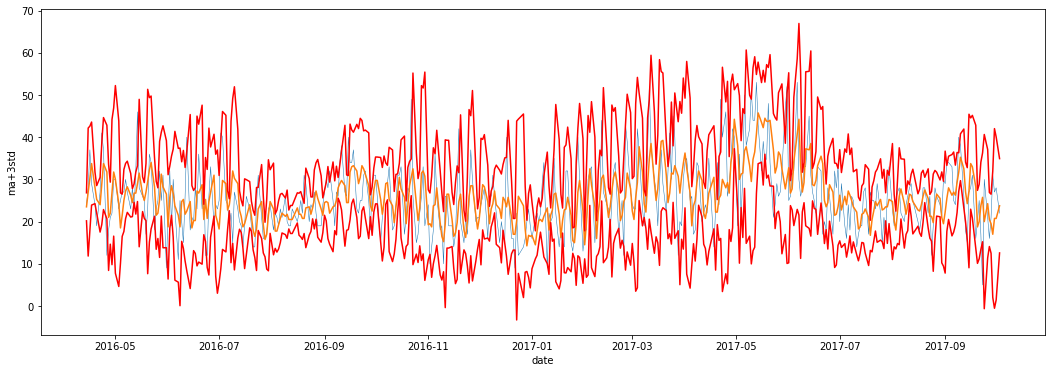

In [0]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df.loc[400:860], x='date', y='sales', lw=0.5, ls='--')
sns.lineplot(data=df.loc[400:860], x='date', y='ma_4')
sns.lineplot(data=df.loc[400:860], x='date', y='ma-3std', color='red')
sns.lineplot(data=df.loc[400:860], x='date', y='ma+3std', color='red')
plt.show()

In [0]:
df.tail()

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays,ma_4,ma_std,ma-3std,ma+3std
1515,2019-11-13,mercoledì,32,10,7,65,sole,0,NaN,36.50,8.077747,20.344506,52.655494
1516,2019-11-14,giovedì,35,8,2,67,sole,0,NaN,39.25,8.466847,22.316306,56.183694
1517,2019-11-15,venerdì,54,10,6,87,sole,0,NaN,43.75,11.924240,19.901520,67.598480
1518,2019-11-16,sabato,52,8,5,92,sole,0,NaN,53.75,3.897114,45.955771,61.544229
1519,2019-11-17,domenica,43,9,5,89,sole,0,NaN,47.50,12.338963,22.822075,72.177925


## Percentage Variations

In [0]:
df['sales_change'] = df.sales.pct_change(periods=1)

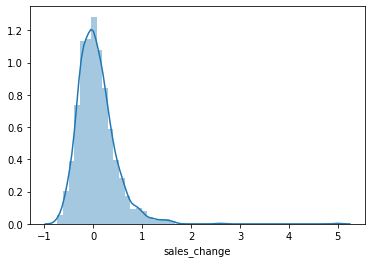

In [0]:
sns.distplot(df.sales_change.dropna(), rug=False)

In [0]:
df.query('sales_change > 1.5')

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays,ma_4,ma_std,ma-3std,ma+3std,sales_change
21,2015-01-24,sabato,28,5,2,75,sole,0,NaN,16.00,3.391165,9.217670,22.782330,1.545455
385,2016-03-26,sabato,26,11,4,65,sole,0,NaN,25.25,9.705024,5.839951,44.660049,1.600000
440,2016-06-01,mercoledì,23,18,13,78,pioggia,0,NaN,18.75,6.179604,6.390793,31.109207,1.555556
581,2016-11-11,venerdì,26,6,2,87,sole,0,NaN,19.50,9.937303,-0.374607,39.374607,1.600000
612,2016-12-17,sabato,40,0,-4,92,sole,0,NaN,23.50,5.852350,11.795300,35.204700,1.666667
672,2017-02-25,sabato,43,8,2,59,sole,0,NaN,25.75,8.613217,8.523567,42.976433,2.583333
853,2017-09-24,domenica,30,16,13,81,pioggia temporale,serie A,NaN,20.00,10.319884,-0.639767,40.639767,5.000000


In [0]:
df.loc[[671, 672, 852, 853]]

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays,ma_4,ma_std,ma-3std,ma+3std,sales_change
671,2017-02-24,venerdì,12,8,7,91,nebbia,0,NaN,24.75,5.309190,14.131620,35.368380,-0.520000
672,2017-02-25,sabato,43,8,2,59,sole,0,NaN,25.75,8.613217,8.523567,42.976433,2.583333
852,2017-09-23,sabato,5,17,12,73,sole,0,NaN,25.75,5.261891,15.226217,36.273783,-0.705882
853,2017-09-24,domenica,30,16,13,81,pioggia temporale,serie A,NaN,20.00,10.319884,-0.639767,40.639767,5.000000


# Dataset

In [0]:
dataset = df[['sales', 
              't_media',
              't_min',
              'umidità_percentuale', 
              'juventus',
              'sales_change',
              'weather',
              'holidays']].copy()

## Day - Month

In [0]:
def cyclical_feature_encoding(feature, max_val):
    tmp = 2 * np.pi * feature / float(max_val)
    return pd.Series(np.sin(tmp), name=f'{feature.name}_sin'), pd.Series(np.cos(tmp), name=f'{feature.name}_cos')


dataset['day_sin'], dataset['day_cos'] = cyclical_feature_encoding(df.date.dt.dayofweek, max_val=6)
dataset['month_sin'], dataset['month_cos'] = cyclical_feature_encoding(df.date.dt.month, max_val=12)

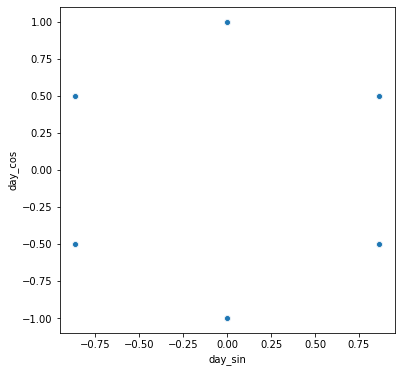

In [0]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='day_sin', y='day_cos', data=dataset)
plt.show()

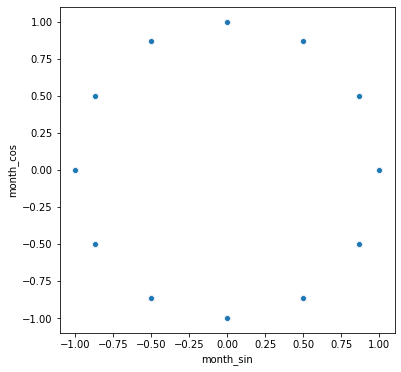

In [0]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='month_sin', y='month_cos', data=dataset)
plt.show()

## Teams

In [0]:
dataset.juventus = dataset.juventus.apply(lambda x: 0 if x == '0' else 1)

## Lag

In [0]:
lag_window = [1, 5, 6, 7, 11, 12, 13]
lag_columns = ['sales', 'weather', 'juventus', 'holidays']

In [0]:
for lag in lag_window:
    for col in lag_columns:
        dataset[f'lag{lag}_{col}'] = dataset[col].shift(lag)

In [0]:
dataset = dataset.iloc[max(lag_window):]

## Holidays

In [0]:
dataset.holidays.unique()

array([nan, 'Giovedì Grasso', 'San Valentino', 'Carnevale',
       'Martedì Grasso', 'Festa di San Giuseppe', 'Domenica delle Palme',
       'Pasqua', 'Anniversario della Liberazione', 'Festa dei Lavoratori',
       'Festa della Mamma', 'Pentecoste', 'Festa della Repubblica',
       'Ferragosto', 'Ognissanti', 'Immacolata Concezione',
       'Santo Stefano', "Ultimo dell'Anno", 'Epifania',
       'Giorno dei Morti', "Primo dell'Anno"], dtype=object)

In [0]:
dataset = pd.concat([dataset, pd.get_dummies(dataset.holidays, dummy_na=False)], axis=1)
dataset.drop(columns=['holidays'], inplace=True)

In [0]:
for lag in lag_window:
    col = f'lag{lag}_holidays'
    dataset = pd.concat([dataset, pd.get_dummies(dataset[col], dummy_na=False, prefix=f'lag{lag}')], axis=1)
    dataset.drop(columns=[col], inplace=True)

In [0]:
dataset.columns.tolist()

['sales',
 't_media',
 't_min',
 'umidità_percentuale',
 'juventus',
 'sales_change',
 'weather',
 'day_sin',
 'day_cos',
 'month_sin',
 'month_cos',
 'lag1_sales',
 'lag1_weather',
 'lag1_juventus',
 'lag5_sales',
 'lag5_weather',
 'lag5_juventus',
 'lag6_sales',
 'lag6_weather',
 'lag6_juventus',
 'lag7_sales',
 'lag7_weather',
 'lag7_juventus',
 'lag11_sales',
 'lag11_weather',
 'lag11_juventus',
 'lag12_sales',
 'lag12_weather',
 'lag12_juventus',
 'lag13_sales',
 'lag13_weather',
 'lag13_juventus',
 'Anniversario della Liberazione',
 'Carnevale',
 'Domenica delle Palme',
 'Epifania',
 'Ferragosto',
 'Festa dei Lavoratori',
 'Festa della Mamma',
 'Festa della Repubblica',
 'Festa di San Giuseppe',
 'Giorno dei Morti',
 'Giovedì Grasso',
 'Immacolata Concezione',
 'Martedì Grasso',
 'Ognissanti',
 'Pasqua',
 'Pentecoste',
 "Primo dell'Anno",
 'San Valentino',
 'Santo Stefano',
 "Ultimo dell'Anno",
 'lag1_Anniversario della Liberazione',
 'lag1_Carnevale',
 'lag1_Domenica delle Palme

## Weather

In [0]:
df.weather.unique()

array(['sole', 'nebbia ', 'pioggia nebbia ', 'pioggia ',
       'pioggia temporale nebbia ', 'pioggia temporale ', 'temporale ',
       'pioggia neve nebbia ', 'neve ', 'pioggia neve '], dtype=object)

In [0]:
dataset = pd.concat([dataset, pd.get_dummies(dataset.weather, drop_first=True, dummy_na=False)], axis=1)
dataset.drop(columns=['weather'], inplace=True)

In [0]:
for lag in lag_window:
    col = f'lag{lag}_weather'
    dataset = pd.concat([dataset, pd.get_dummies(dataset[col], drop_first=True, dummy_na=False, prefix=f'lag{lag}')], axis=1)
    dataset.drop(columns=[col], inplace=True)

## Check Dataset has no empty columns

In [0]:
with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):
    print(dataset.isnull().any(axis=0))

                                        False
sales                                   False
t_media                                 False
t_min                                   False
umidità_percentuale                     False
juventus                                False
sales_change                            False
day_sin                                 False
day_cos                                 False
month_sin                               False
month_cos                               False
lag1_sales                              False
lag1_juventus                           False
lag5_sales                              False
lag5_juventus                           False
lag6_sales                              False
lag6_juventus                           False
lag7_sales                              False
lag7_juventus                           False
lag11_sales                             False
lag11_juventus                          False
lag12_sales                       

# Basic Model - Linear Regression

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, RandomizedSearchCV

In [0]:
TEST_SIZE = 0.15

In [0]:
X = dataset.drop(columns=['sales', 'sales_change'])
y = dataset.sales

split_idx = dataset.iloc[int(len(dataset)*(1-TEST_SIZE))].name

X_train, X_test = X.loc[:split_idx], X.loc[split_idx:]
y_train, y_test = y.loc[:split_idx], y.loc[split_idx:]

sample_weights = [np.exp(t/float(len(y_train))) for t in range(len(y_train))]

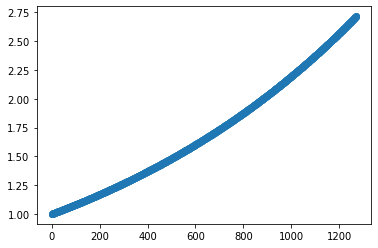

In [0]:
plt.scatter([t for t in range(len(y_train))], sample_weights)

In [0]:
model = Ridge()

In [0]:
hyperparameters = {'alpha': np.linspace(start=0., stop=50., num=50)}

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=hyperparameters,
                                   n_iter=50,
                                   cv=TimeSeriesSplit(n_splits=10),
                                   n_jobs=-1)

In [0]:
random_search.fit(X_train, y_train, sample_weight=sample_weights)

RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
                   error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6....
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])},
                   pre_dispatch='2*n_jobs', random_state=No

In [0]:
random_search.cv_results_['mean_test_score']

array([-2.80846912e+25,  2.82326644e-01,  3.05307273e-01,  3.14619731e-01,
        3.20068000e-01,  3.23933767e-01,  3.26987371e-01,  3.29551501e-01,
        3.31783993e-01,  3.33772097e-01,  3.35569094e-01,  3.37210276e-01,
        3.38720593e-01,  3.40118610e-01,  3.41418712e-01,  3.42632395e-01,
        3.43769074e-01,  3.44836608e-01,  3.45841660e-01,  3.46789946e-01,
        3.47686424e-01,  3.48535427e-01,  3.49340772e-01,  3.50105840e-01,
        3.50833645e-01,  3.51526885e-01,  3.52187985e-01,  3.52819134e-01,
        3.53422314e-01,  3.53999328e-01,  3.54551817e-01,  3.55081282e-01,
        3.55589096e-01,  3.56076522e-01,  3.56544721e-01,  3.56994765e-01,
        3.57427644e-01,  3.57844274e-01,  3.58245505e-01,  3.58632126e-01,
        3.59004873e-01,  3.59364430e-01,  3.59711436e-01,  3.60046489e-01,
        3.60370146e-01,  3.60682931e-01,  3.60985336e-01,  3.61277822e-01,
        3.61560822e-01,  3.61834746e-01])

In [0]:
random_search.best_params_

{'alpha': 50.0}

In [0]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=model, 
                X=X_train, 
                y=y_train, 
                cv=TimeSeriesSplit(n_splits=10),
                n_jobs=-1)

array([0.26503059, 0.42715208, 0.06263224, 0.16665721, 0.33549739,
       0.33940691, 0.19668608, 0.35682717, 0.35907972, 0.45367734])

In [0]:
best_model = random_search.best_estimator_

In [0]:
pred = np.round(best_model.predict(X_test))

**Observed vs Predicted**

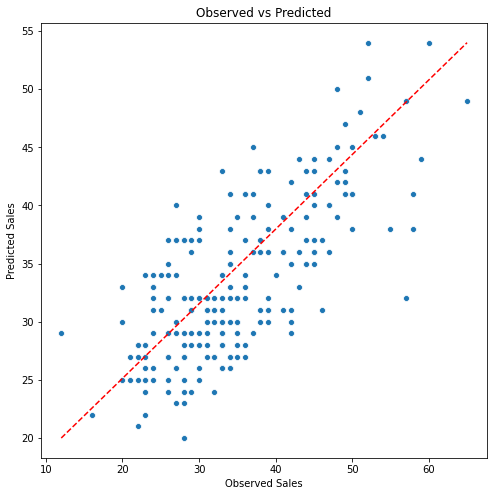

In [0]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(pred), max(pred)], lw=1.5, color='red', ls='--')
plt.xlabel('Observed Sales')
plt.ylabel('Predicted Sales')
plt.title('Observed vs Predicted')
plt.show()

### Metrics

**Coefficient of Determination**

In [0]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=pred)

0.5037637362637362

**Average Percentage Error**

In [0]:
((y_test - pred)/y_test).abs().mean()

0.16033790471415804

## Time-Series Observed vs Prediction

**All time-series**

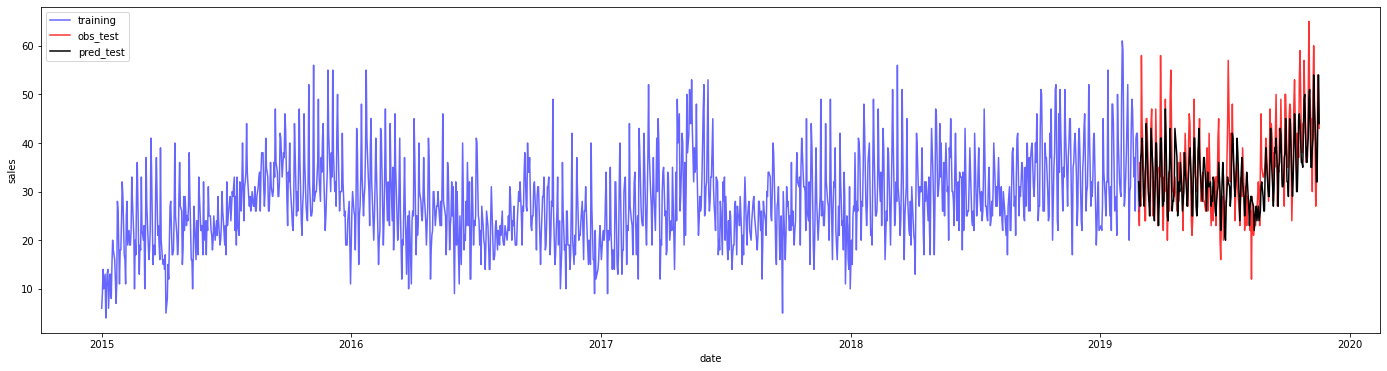

In [0]:
fig, ax = plt.subplots(figsize=(24, 6))
sns.lineplot(x='date', y='sales', data=df.loc[:split_idx], color='blue', alpha=0.6, label='training', ax=ax)
sns.lineplot(x='date', y='sales', data=df.loc[split_idx:], color='red', alpha=0.8, label='obs_test', ax=ax)
sns.lineplot(x=df.loc[split_idx:, 'date'], y=pred, color='black', label='pred_test', ax=ax)
plt.show()

**Test time-series**

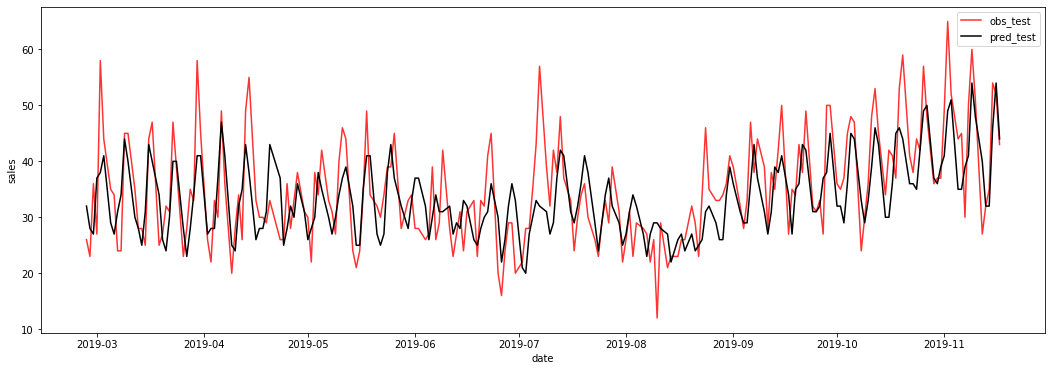

In [0]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(x='date', y='sales', data=df.loc[split_idx:], color='red', alpha=0.8, label='obs_test', ax=ax)
sns.lineplot(x=df.loc[split_idx:, 'date'], y=pred, color='black', label='pred_test', ax=ax)
plt.show()

## Prediction Error

In [0]:
results = pd.DataFrame({'date': df.loc[split_idx:, 'date'], 'y_true': y_test.values, 'y_pred': pred})

In [0]:
results.head()

,date,y_true,y_pred
1294,2019-02-26,26,32.0
1295,2019-02-27,23,28.0
1296,2019-02-28,36,27.0
1297,2019-03-01,27,37.0
1298,2019-03-02,58,38.0


In [0]:
results['residuals'] = results.y_true - results.y_pred
results['abs_res'] = results.residuals.abs()
results['mae'] = results.abs_res / results.y_true

In [0]:
results.sort_values(by=['abs_res'], ascending=False, inplace=True)

In [0]:
results = pd.merge(left=results, right=df, on='date')

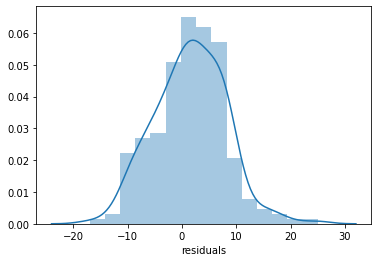

In [0]:
sns.distplot(results.residuals)
plt.show()

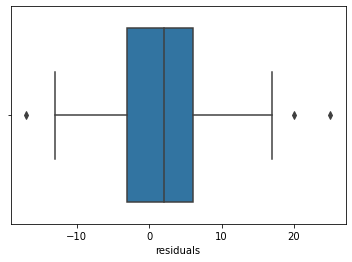

In [0]:
sns.boxplot(results.residuals)
plt.show()

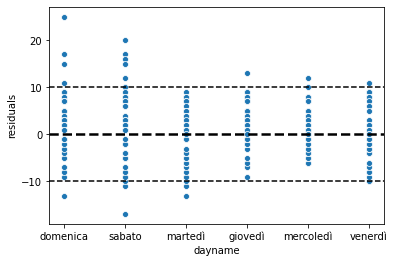

In [0]:
sns.scatterplot(x='dayname', y='residuals', data=results)
plt.axhline(0, color='black', lw=2.5, ls='--')
plt.axhline(-10, color='black', lw=1.5, ls='--')
plt.axhline(10, color='black', lw=1.5, ls='--')
plt.show()

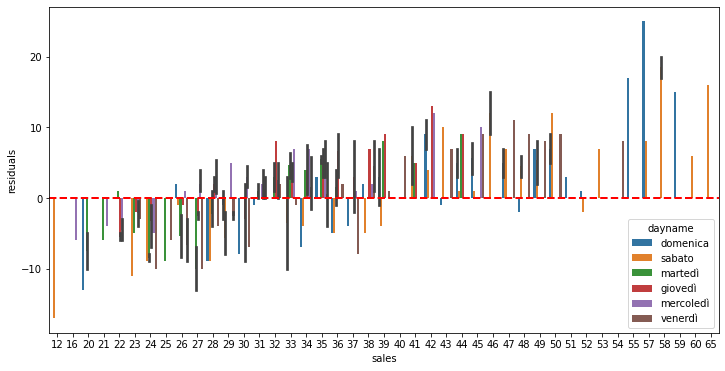

In [0]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sales', y='residuals', hue='dayname', data=results)
plt.axhline(0, color='red', lw=2, ls='--')
plt.show()

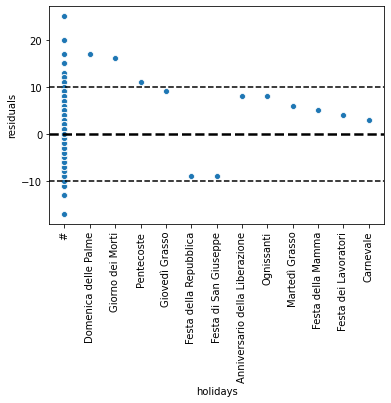

In [0]:
results.holidays.fillna('#', inplace=True)
sns.scatterplot(x='holidays', y='residuals', data=results)
plt.axhline(0, color='black', lw=2.5, ls='--')
plt.axhline(-10, color='black', lw=1.5, ls='--')
plt.axhline(10, color='black', lw=1.5, ls='--')
plt.xticks(rotation=90)
plt.show()

### Worst Predictions

In [0]:
worst_pred = results.query('mae > 0.10')

In [0]:
worst_pred

,date,y_true,y_pred,residuals,abs_res,mae,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays,ma_4,ma_std,ma-3std,ma+3std,sales_change
0,2019-07-07,57,32.0,25.0,25.0,0.438596,domenica,57,26,21,64,sole,0,#,28.50,9.013878,10.472244,46.527756,0.325581
1,2019-03-02,58,38.0,20.0,20.0,0.344828,sabato,58,9,1,69,sole,0,#,38.00,6.363961,25.272078,50.727922,1.148148
2,2019-08-10,12,29.0,-17.0,17.0,1.416667,sabato,12,28,23,65,sole,0,#,27.25,3.031089,21.187822,33.312178,-0.538462
3,2019-03-30,58,41.0,17.0,17.0,0.293103,sabato,58,13,6,53,sole,0,#,37.50,6.224950,25.050100,49.949900,0.757576
4,2019-04-14,55,38.0,17.0,17.0,0.309091,domenica,55,10,8,69,sole,serie A,Domenica delle Palme,38.50,11.926860,14.646279,62.353721,0.122449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2019-07-23,26,29.0,-3.0,3.0,0.115385,martedì,26,29,23,60,sole,0,#,31.00,4.743416,21.513167,40.486833,-0.133333
152,2019-08-16,23,26.0,-3.0,3.0,0.130435,venerdì,23,23,17,61,sole,0,#,24.50,2.061553,20.376894,28.623106,0.000000
155,2019-08-09,26,29.0,-3.0,3.0,0.115385,venerdì,26,27,21,69,sole,0,#,25.50,3.500000,18.500000,32.500000,0.181818
157,2019-08-04,29,32.0,-3.0,3.0,0.103448,domenica,29,25,20,61,sole,0,#,30.50,5.722762,19.054477,41.945523,0.260870


# Building a simple neural network for regression


In [0]:
from sklearn import datasets
import tensorflow as tf
import itertools

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

from tensorflow import keras
from tensorflow.keras import layers

!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-yy1yonpt
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-yy1yonpt
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80383 sha256=5c2e3323e263a932d21c3b6045ba9eb54c8fe4995fb246ce78677cfa3c368071
  Stored in directory: /tmp/pip-ephem-wheel-cache-p3_3qj_e/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


## Splitting the dataset into Train and Test

In [0]:


df_train = dataset.iloc[:1320]
df_traintest = dataset.iloc[1320:1400]
df_test = dataset.iloc[1400:]



In [0]:
df_traintest.head()

,sales,t_media,t_min,umidità_percentuale,juventus,sales_change,day_sin,day_cos,month_sin,month_cos,lag1_sales,lag1_juventus,lag5_sales,lag5_juventus,lag6_sales,lag6_juventus,lag7_sales,lag7_juventus,lag11_sales,lag11_juventus,lag12_sales,lag12_juventus,lag13_sales,lag13_juventus,Anniversario della Liberazione,Carnevale,Domenica delle Palme,Epifania,Ferragosto,Festa dei Lavoratori,Festa della Mamma,Festa della Repubblica,Festa di San Giuseppe,Giorno dei Morti,Giovedì Grasso,Immacolata Concezione,Martedì Grasso,Ognissanti,Pasqua,Pentecoste,...,lag6_pioggia temporale,lag6_pioggia temporale nebbia,lag6_sole,lag6_temporale,lag7_neve,lag7_pioggia,lag7_pioggia nebbia,lag7_pioggia neve,lag7_pioggia neve nebbia,lag7_pioggia temporale,lag7_pioggia temporale nebbia,lag7_sole,lag7_temporale,lag11_neve,lag11_pioggia,lag11_pioggia nebbia,lag11_pioggia neve,lag11_pioggia neve nebbia,lag11_pioggia temporale,lag11_pioggia temporale nebbia,lag11_sole,lag11_temporale,lag12_neve,lag12_pioggia,lag12_pioggia nebbia,lag12_pioggia neve,lag12_pioggia neve nebbia,lag12_pioggia temporale,lag12_pioggia temporale nebbia,lag12_sole,lag12_temporale,lag13_neve,lag13_pioggia,lag13_pioggia nebbia,lag13_pioggia neve,lag13_pioggia neve nebbia,lag13_pioggia temporale,lag13_pioggia temporale nebbia,lag13_sole,lag13_temporale
1344,36,15,10,85,0,0.384615,1.224647e-16,-1.0,0.866025,-0.5,26.0,0.0,30.0,0.0,30.0,1.0,33.0,0.0,34.0,1.0,28.0,0.0,20.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1345,28,16,11,79,0,-0.222222,-8.660254e-01,-0.5,0.866025,-0.5,36.0,0.0,29.0,0.0,30.0,0.0,30.0,1.0,26.0,0.0,34.0,1.0,28.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1346,33,15,6,61,0,0.178571,-8.660254e-01,0.5,0.866025,-0.5,28.0,0.0,33.0,0.0,29.0,0.0,30.0,0.0,49.0,0.0,26.0,0.0,34.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1347,38,12,9,68,1,0.151515,-2.449294e-16,1.0,0.866025,-0.5,33.0,0.0,26.0,0.0,33.0,0.0,29.0,0.0,55.0,1.0,49.0,0.0,26.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1348,31,15,7,58,0,-0.184211,8.660254e-01,0.5,0.866025,-0.5,38.0,1.0,26.0,0.0,26.0,0.0,33.0,0.0,33.0,0.0,55.0,1.0,49.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
df_test.head()

,sales,t_media,t_min,umidità_percentuale,juventus,sales_change,day_sin,day_cos,month_sin,month_cos,lag1_sales,lag1_juventus,lag5_sales,lag5_juventus,lag6_sales,lag6_juventus,lag7_sales,lag7_juventus,lag11_sales,lag11_juventus,lag12_sales,lag12_juventus,lag13_sales,lag13_juventus,Anniversario della Liberazione,Carnevale,Domenica delle Palme,Epifania,Ferragosto,Festa dei Lavoratori,Festa della Mamma,Festa della Repubblica,Festa di San Giuseppe,Giorno dei Morti,Giovedì Grasso,Immacolata Concezione,Martedì Grasso,Ognissanti,Pasqua,Pentecoste,...,lag6_pioggia temporale,lag6_pioggia temporale nebbia,lag6_sole,lag6_temporale,lag7_neve,lag7_pioggia,lag7_pioggia nebbia,lag7_pioggia neve,lag7_pioggia neve nebbia,lag7_pioggia temporale,lag7_pioggia temporale nebbia,lag7_sole,lag7_temporale,lag11_neve,lag11_pioggia,lag11_pioggia nebbia,lag11_pioggia neve,lag11_pioggia neve nebbia,lag11_pioggia temporale,lag11_pioggia temporale nebbia,lag11_sole,lag11_temporale,lag12_neve,lag12_pioggia,lag12_pioggia nebbia,lag12_pioggia neve,lag12_pioggia neve nebbia,lag12_pioggia temporale,lag12_pioggia temporale nebbia,lag12_sole,lag12_temporale,lag13_neve,lag13_pioggia,lag13_pioggia nebbia,lag13_pioggia neve,lag13_pioggia neve nebbia,lag13_pioggia temporale,lag13_pioggia temporale nebbia,lag13_sole,lag13_temporale
1424,39,21,19,86,0,0.344828,-2.449294e-16,1.0,-0.500000,-0.866025,29.0,0.0,26.0,0.0,30.0,0.0,36.0,0.0,33.0,0.0,37.0,0.0,48.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1425,31,27,21,65,0,-0.205128,8.660254e-01,0.5,-0.500000,-0.866025,39.0,0.0,23.0,0.0,26.0,0.0,30.0,0.0,24.0,0.0,33.0,0.0,37.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1426,22,26,22,68,0,-0.290323,8.660254e-01,-0.5,-0.500000,-0.866025,31.0,0.0,29.0,0.0,23.0,0.0,26.0,0.0,30.0,0.0,24.0,0.0,33.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1427,26,28,21,59,0,0.181818,1.224647e-16,-1.0,-0.866025,-0.500000,22.0,0.0,33.0,0.0,29.0,0.0,23.0,0.0,34.0,0.0,30.0,0.0,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1428,31,24,18,75,0,0.192308,-8.660254e-01,-0.5,-0.866025,-0.500000,26.0,0.0,29.0,0.0,33.0,0.0,29.0,0.0,36.0,0.0,34.0,0.0,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
train_stats = df_train.describe()

train_stats

,sales,t_media,t_min,umidità_percentuale,juventus,sales_change,day_sin,day_cos,month_sin,month_cos,lag1_sales,lag1_juventus,lag5_sales,lag5_juventus,lag6_sales,lag6_juventus,lag7_sales,lag7_juventus,lag11_sales,lag11_juventus,lag12_sales,lag12_juventus,lag13_sales,lag13_juventus,Anniversario della Liberazione,Carnevale,Domenica delle Palme,Epifania,Ferragosto,Festa dei Lavoratori,Festa della Mamma,Festa della Repubblica,Festa di San Giuseppe,Giorno dei Morti,Giovedì Grasso,Immacolata Concezione,Martedì Grasso,Ognissanti,Pasqua,Pentecoste,...,lag6_pioggia temporale,lag6_pioggia temporale nebbia,lag6_sole,lag6_temporale,lag7_neve,lag7_pioggia,lag7_pioggia nebbia,lag7_pioggia neve,lag7_pioggia neve nebbia,lag7_pioggia temporale,lag7_pioggia temporale nebbia,lag7_sole,lag7_temporale,lag11_neve,lag11_pioggia,lag11_pioggia nebbia,lag11_pioggia neve,lag11_pioggia neve nebbia,lag11_pioggia temporale,lag11_pioggia temporale nebbia,lag11_sole,lag11_temporale,lag12_neve,lag12_pioggia,lag12_pioggia nebbia,lag12_pioggia neve,lag12_pioggia neve nebbia,lag12_pioggia temporale,lag12_pioggia temporale nebbia,lag12_sole,lag12_temporale,lag13_neve,lag13_pioggia,lag13_pioggia nebbia,lag13_pioggia neve,lag13_pioggia neve nebbia,lag13_pioggia temporale,lag13_pioggia temporale nebbia,lag13_sole,lag13_temporale
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1.320000e+03,1320.000000,1.320000e+03,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,28.339394,13.993939,9.018939,71.127273,0.109848,0.066134,-3.280399e-03,-0.001894,4.761120e-02,6.385002e-03,28.325758,0.109848,28.271212,0.109848,28.258333,0.109091,28.240909,0.109091,28.147727,0.108333,28.133333,0.108333,28.122727,0.108333,0.002273,0.003788,0.003788,0.003030,0.000758,0.002273,0.003030,0.003030,0.003030,0.002273,0.003788,0.003030,0.003788,0.003030,0.000758,0.003030,...,0.050758,0.005303,0.728030,0.003788,0.002273,0.115152,0.030303,0.002273,0.002273,0.050758,0.005303,0.728030,0.003788,0.002273,0.115152,0.030303,0.002273,0.002273,0.050758,0.005303,0.728030,0.003788,0.002273,0.115152,0.030303,0.002273,0.002273,0.050758,0.005303,0.728030,0.003788,0.002273,0.115152,0.030303,0.002273,0.002273,0.050758,0.005303,0.728030,0.003788
std,9.097899,8.382170,7.773154,14.102748,0.312819,0.402320,7.085719e-01,0.706165,7.155046e-01,6.974970e-01,9.114881,0.312819,9.162128,0.312819,9.171639,0.311871,9.184463,0.311871,9.191015,0.310919,9.206112,0.310919,9.223537,0.310919,0.047637,0.061452,0.061452,0.054986,0.027524,0.047637,0.054986,0.054986,0.054986,0.047637,0.061452,0.054986,0.061452,0.054986,0.027524,0.054986,...,0.219585,0.072656,0.445143,0.061452,0.047637,0.319326,0.171485,0.047637,0.047637,0.219585,0.072656,0.445143,0.061452,0.047637,0.319326,0.171485,0.047637,0.047637,0.219585,0.072656,0.445143,0.061452,0.047637,0.319326,0.171485,0.047637,0.047637,0.219585,0.072656,0.445143,0.061452,0.047637,0.319326,0.171485,0.047637,0.047637,0.219585,0.072656,0.445143,0.061452
min,5.000000,-3.000000,-8.000000,0.000000,0.000000,-0.735294,-8.660254e-01,-1.000000,-1.000000e+00,-1.000000e+00,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.0

In [0]:
train_stats.pop('sales')
train_stats = train_stats.transpose()

In [0]:
train_labels = df_train.pop('sales')
traintest_labels = df_traintest.pop('sales')
test_labels = df_test.pop('sales')

##Normalization

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(df_train)
normed_test_data = norm(df_test)
normed_traintest_data = norm(df_traintest)

##Building the model

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(df_train.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_data=(normed_traintest_data, traintest_labels), shuffle=False, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2.7273,  mean_absolute_error:1.3127,  mean_squared_error:2.7273,  val_loss:13.1839,  val_mean_absolute_error:2.7868,  val_mean_squared_error:13.1839,  
....................................................................................................
Epoch: 100, loss:0.9905,  mean_absolute_error:0.7401,  mean_squared_error:0.9905,  val_loss:9.6160,  val_mean_absolute_error:2.0097,  val_mean_squared_error:9.6160,  
....................................................................................................
Epoch: 200, loss:5.6252,  mean_absolute_error:1.9109,  mean_squared_error:5.6252,  val_loss:12.7663,  val_mean_absolute_error:2.6936,  val_mean_squared_error:12.7663,  
....................................................................................................
Epoch: 300, loss:0.0861,  mean_absolute_error:0.2193,  mean_squared_error:0.0861,  val_loss:12.3541,  val_mean_absolute_error:2.2069,  val_mean_squared_error:12.3541,  
........................

##Metrics

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.256180,0.416748,0.256180,16.865297,2.543630,16.865297,995
996,0.202530,0.362587,0.202530,15.769944,2.536958,15.769943,996
997,0.096030,0.242940,0.096030,16.185340,2.555325,16.185339,997
998,0.145637,0.313517,0.145637,17.219973,2.574175,17.219975,998
999,0.047616,0.168757,0.047616,17.642034,2.635106,17.642035,999


Text(0, 0.5, 'MAE [sales]')

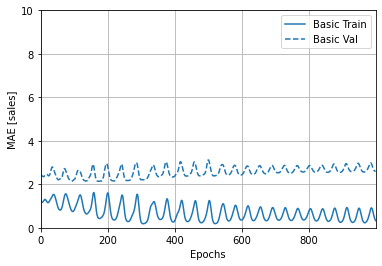

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [sales]')

##EarlyStopping callback

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10), 
              keras.callbacks.ModelCheckpoint(filepath="model_{epoch:04d}_{val_loss:.2f}.h5", save_best_only=True, monitor='val_loss')]

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_data = (normed_traintest_data, traintest_labels), shuffle=False, verbose=0, 
                    callbacks=early_stop)

##Precision evaluation

Text(0, 0.5, 'MAE [Sales]')

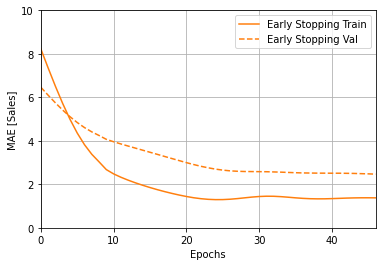

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [Sales]')

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Polli".format(mae))

96/96 - 0s - loss: 18.9727 - mean_absolute_error: 2.1883 - mean_squared_error: 18.9727
Testing set Mean Abs Error:  2.19 Polli


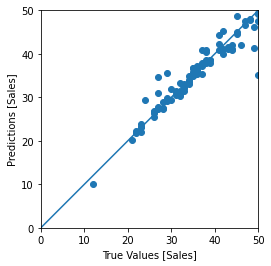

In [0]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Sales]')
plt.ylabel('Predictions [Sales]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
r2_score(y_true=test_labels, y_pred=test_predictions)

0.8143346649395173

In [0]:
((test_labels - test_predictions)/test_labels).abs().mean()

0.05344683272765527

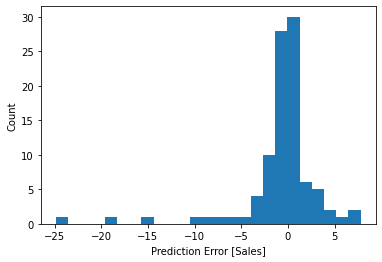

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Sales]")
_ = plt.ylabel("Count")

In [0]:
print(test_predictions)

[37.97517  30.476309 21.795883 26.93016  31.511305 22.1164   29.760054
 27.466993 27.26947  22.187376 26.619226  9.987587 35.528637 20.269838
 23.958218 23.122375 25.426914 26.421446 30.71521  29.060465 23.229658
 33.026154 41.977966 35.78872  31.405752 32.24152  33.542152 35.263973
 40.818783 38.68407  30.196665 27.26013  33.00932  46.72862  40.442677
 41.228302 38.558224 28.830097 38.562122 36.75065  41.117897 47.586613
 31.069607 35.227863 34.835194 41.492756 40.81211  46.112392 33.40279
 31.32977  32.42848  27.701    49.125114 49.448227 36.37562  34.891544
 35.391083 44.967102 47.892803 47.50583  29.303799 29.344345 37.160774
 47.90701  52.57606  48.652122 34.035347 40.007195 42.30499  40.836777
 53.181355 56.043617 44.27416  37.999928 42.058815 45.210106 57.485638
 52.186596 36.02482  37.23643  37.845116 41.25986  40.16954  50.202694
 40.910744 44.480057 31.83467  35.082733 41.02704  40.843987 34.781532
 31.2387   36.6832   45.3697   45.901405 41.164284]


In [0]:
print(test_labels)

1424    39
1425    31
1426    22
1427    26
1428    31
        ..
1515    32
1516    35
1517    54
1518    52
1519    43
Name: sales, Length: 96, dtype: int64


In [0]:
df_plot = test_labels.copy()
df_index = df['date'].iloc[1413:]
df_results = pd.DataFrame({'date': df_index, 'y_true': test_labels.values, 'y_pred': test_predictions})


In [0]:
df_results.head()

,date,y_true,y_pred
1424,2019-07-28,39,37.975170
1425,2019-07-30,31,30.476309
1426,2019-07-31,22,21.795883
1427,2019-08-01,26,26.930161
1428,2019-08-02,31,31.511305


In [0]:
df_results['y_true'].describe()

count    96.000000
mean     37.510417
std      10.161843
min      12.000000
25%      30.000000
50%      36.000000
75%      45.000000
max      65.000000
Name: y_true, dtype: float64

In [0]:
df_results['y_pred'].describe()

count    96.000000
mean     36.744617
std       8.744286
min       9.987587
25%      30.981008
50%      36.529411
75%      41.614058
max      57.485638
Name: y_pred, dtype: float64

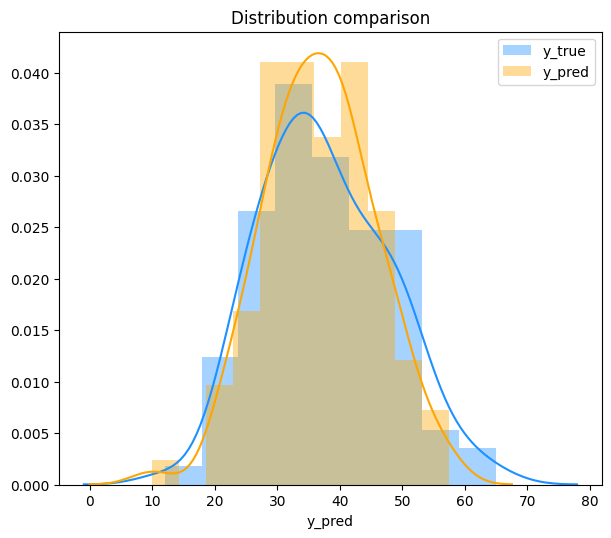

In [0]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_results['y_true'], color="dodgerblue", label="y_true")
sns.distplot( df_results['y_pred'] , color="orange", label="y_pred")

plt.title('Distribution comparison')
plt.legend();

##Time series precision plot

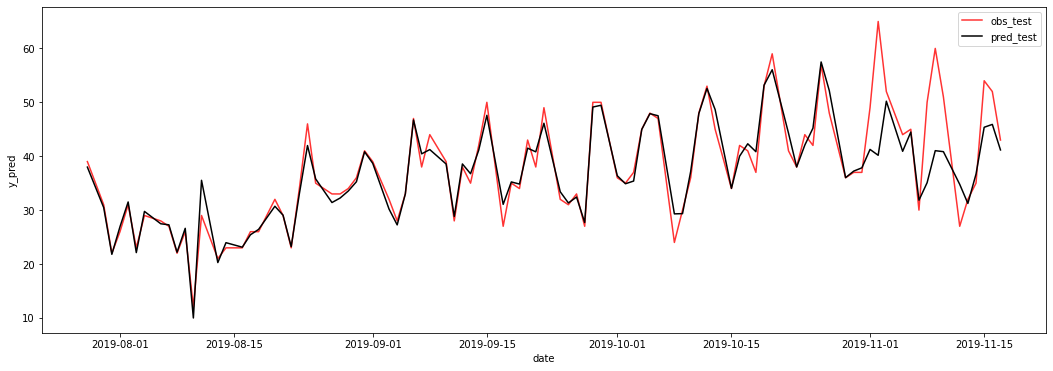

In [0]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(x='date', y='y_true', data=df_results, color='red', alpha=0.8, label='obs_test', ax=ax)
sns.lineplot(x='date', y='y_pred', data=df_results, color='black', label='pred_test', ax=ax)
plt.show()

